In [71]:
import pandas as pd

df = pd.read_excel("data/appliedAI_Use Case Library - Risk Class_TUM.ai.xlsx", index_col=0, header=2)

In [72]:
!pwd

/home/michal/projects/tumai-makeathon22


In [73]:
df["risk"] = df["Is the AI System high-risk or low risk?"]
df["name"]  = df["Use case name EN"]
df["desc"] = df["Description"]
df["bus_ch"] = df["Business Challenge"] 
df["system"] = df["AI System"]

df = df.fillna("")


In [74]:
df = df[df["risk"] != "It is unclear"]
len(df)

115

In [75]:
df = df[df["risk"] != ""]


In [76]:
df["risk"].value_counts()


low-risk     84
high-risk    14
Name: risk, dtype: int64

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['risk'],
                                                    stratify=df['risk'], 
                                                    test_size=0.25,
                                                   random_state=480)

In [181]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Sentences we want to encode. Example:
sentences_cross = df["desc"].to_list()
sentences_train = X_train["desc"].to_list()
sentences_test = X_test["desc"].to_list()
#['Collaborative robots or cobots are robots that have been developed for direct human-robot interaction in a common room or in which people and robots are in the immediate vicinity. This property is practical, especially in factories with a limited floor area because you do not need any special security zones. In contrast to conventional industrial robot applications in which robots are isolated from human contact. Instead of relying on a programmer that tells them what they should do, cobots are often taught by a role model. An operator physically controls the movements of the bot and leads it through its necessary tasks. The cobot can then remember which tasks it has to do and keep performing them with perfect memory.']


#Sentences are encoded by calling model.encode()
embeddings_train = model.encode(sentences_train)
embeddings_test = model.encode(sentences_test)
embeddings_cross = model.encode(sentences_cross)

In [174]:
embeddings_train.shape

(73, 384)

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [257]:
knn = KNeighborsClassifier(n_neighbors=1)

In [258]:
knn.fit(embeddings_train, X_train["risk"])

KNeighborsClassifier(n_neighbors=1)

In [259]:
# pred = knn.predict(embeddings_test)#, X_test["risk"])

In [260]:
from sklearn.metrics import plot_confusion_matrix

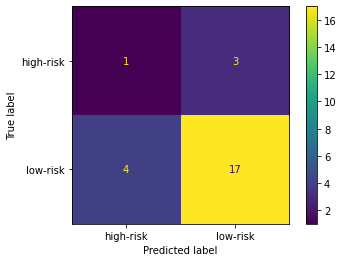

In [261]:
plot_confusion_matrix(knn, embeddings_test, X_test["risk"])

In [246]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, get_scorer, make_scorer
scs = cross_val_score(knn, embeddings_cross, df["risk"], scoring=make_scorer(balanced_accuracy_score))
scs.mean()

0.592156862745098